In [1]:
import sys
import gc
import numpy as np
%matplotlib inline

import pandas as pd

%pylab inline
#import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from astropy.table import Table
from astropy.io import fits
from importlib import reload
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
from matplotlib.backends.backend_pdf import PdfPages

Datadir = '/net/bootes/export/data1/data/'

Gal = {}

N = 1
for ii in range (0,N):    
    file='/scratch2/SAM/Henriques2015a/fits/Database_Lightcones_with_SFH_Henriques2015a_M05_K27_0{:02d}.fits'.format(ii+1)
    print("reading file {:d} of {:d}".format(ii+1,N))    
    fits_table = fits.open(file)    
    #print(fits_table[1].columns)
    Gal[ii] = fits_table[1] 


print("reading done")

Populating the interactive namespace from numpy and matplotlib
reading file 1 of 1
reading done


### Redshift counts

In [6]:
fig , ax = plt.subplots(figsize=(10,10))

xlim = [0, 3]
ylim = [4.5, 5.5]




bin=0.2
hist_limits = [0.0,20.0]
bin_arr=np.arange(hist_limits[0],hist_limits[1]+bin,bin)

all_hists = np.zeros((len(bin_arr)-1,N), dtype=np.float32)
median_hist = np.zeros(len(bin_arr)-1, dtype=np.float32)
pc16_hist = np.zeros(len(bin_arr)-1, dtype=np.float32)
pc84_hist = np.zeros(len(bin_arr)-1, dtype=np.float32)

for ii in range(0,N):
    print("doing file {:d} of {:d}".format(ii+1,N))
    Gal_i = Gal[ii]    
    redshift = Gal_i.data['z_app'][[Gal_i.data['OBS_APP_H']<25.]]
    hist = np.histogram(redshift, bins=bin_arr, range=(hist_limits[0],hist_limits[1]))      
    x_axis=hist[1][0:len(hist[1][:])-1]+bin/2.    
    all_hists[:,ii]=hist[0]/(bin*1.4*1.4)    

for idx, element in enumerate(x_axis):   
    median_hist[idx] = np.median(all_hists[idx,:])
    pc16_hist[idx] = np.percentile(all_hists[idx,:],16)
    pc84_hist[idx] = np.percentile(all_hists[idx,:],84)
    
sel = where(pc16_hist>0.)
ax.fill_between(x_axis[sel],np.log10(pc16_hist[sel]),np.log10(pc84_hist[sel]),facecolor='grey', interpolate=True, alpha=0.3)  
ax.plot(x_axis,np.log10(median_hist))
        
ax.set_xlim(xlim), ax.set_ylim(ylim)
ax.set_xlabel('Redshift'), ax.set_ylabel('$\log_{10}(N[\mathrm{deg}^{-2}\mathrm{z}^{-1}])$')

plt.savefig('./fig/Moons_zcounts.pdf')
plt.close()

doing file 1 of 15
doing file 2 of 15


/export/data1/Workspace/GitHub_Python_plots/py3env/lib/python3.6/site-packages/ipykernel_launcher.py:21: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


doing file 3 of 15
doing file 4 of 15
doing file 5 of 15
doing file 6 of 15
doing file 7 of 15
doing file 8 of 15
doing file 9 of 15
doing file 10 of 15
doing file 11 of 15
doing file 12 of 15
doing file 13 of 15
doing file 14 of 15
doing file 15 of 15


/export/data1/Workspace/GitHub_Python_plots/py3env/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: divide by zero encountered in log10


### H-band number counts

In [4]:
fig , ax = plt.subplots(figsize=(10,10))

xlim = [10, 25]
ylim = [0., 6.]

ax.set_xlim(xlim), ax.set_ylim(ylim)
ax.set_xlabel('Redshift'), ax.set_ylabel('$\log_{10}(N[\mathrm{deg}^{-2}\mathrm{mag}^{-1}])$')


bin=0.5
hist_limits = [0.0,30.0]
bin_arr=np.arange(hist_limits[0],hist_limits[1]+bin,bin)

all_hists = np.zeros((len(bin_arr)-1,N), dtype=np.float32)
median_hist = np.zeros(len(bin_arr)-1, dtype=np.float32)
pc16_hist = np.zeros(len(bin_arr)-1, dtype=np.float32)
pc84_hist = np.zeros(len(bin_arr)-1, dtype=np.float32)

for ii in range(0,N):
    Gal_i = Gal[ii]    
    redshift = Gal_i.data['OBS_APP_H'][[Gal_i.data['OBS_APP_H']<25.]]
    hist = np.histogram(redshift, bins=bin_arr, range=(hist_limits[0],hist_limits[1]))      
    x_axis=hist[1][0:len(hist[1][:])-1]+bin/2.    
    all_hists[:,ii]=hist[0]/(bin*1.4*1.4)   

for idx, element in enumerate(x_axis):   
    median_hist[idx] = np.median(all_hists[idx,:])
    pc16_hist[idx] = np.percentile(all_hists[idx,:],16)
    pc84_hist[idx] = np.percentile(all_hists[idx,:],84)
    
sel = where(pc16_hist>0.)
ax.fill_between(x_axis[sel],np.log10(pc16_hist[sel]),np.log10(pc84_hist[sel]),facecolor='grey', interpolate=True, alpha=0.3)  
ax.plot(x_axis,np.log10(median_hist))
  

columns = ['mag','phi_j','error_j','phi_h','error_h','phi_k','error_k']
df_obs = pd.read_csv(Datadir+'keenan2010_jhk_counts.txt', skiprows=[0], header=None, delimiter=' ', names= columns)
df_obs['error_h'] = np.log10(10**df_obs['phi_h']+10**df_obs['error_h'])-np.log10(10**df_obs['phi_h']-10**df_obs['error_h'])
ax.errorbar(df_obs['mag'], df_obs['phi_h'], df_obs['error_h'], fmt='o', markersize=5, mfc='darkviolet', markeredgecolor='darkviolet', color='darkviolet')

plt.savefig('./fig/Moons_Hcounts.pdf')
plt.close()

/export/data1/Workspace/GitHub_Python_plots/py3env/lib/python3.6/site-packages/ipykernel_launcher.py:21: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
/export/data1/Workspace/GitHub_Python_plots/py3env/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: divide by zero encountered in log10


### Z_geo vs redshift

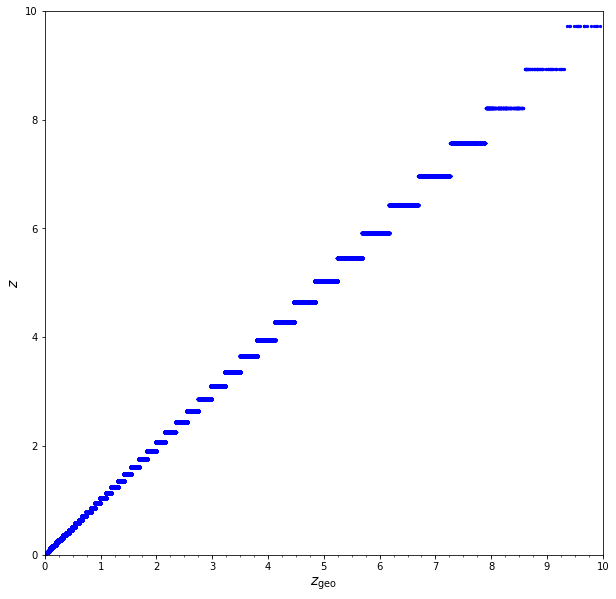

In [6]:
#Nrandom=1000
#Gal=np.random.choice(Gal, size=Nrandom)

z_geo=Gal[0].data['z_geo'][::-1]
redshift=Gal[0].data['redshift'][::-1]

#cols = Gal.columns
#print(cols)

xlim=[0,10.0]
ylim=[0,10.0]

fig = plt.figure(figsize=(10,10))
subplot=plt.subplot()
subplot.set_ylim(ylim), subplot.set_xlim(xlim)    
            
#format axis
majorFormatter = FormatStrFormatter('%d')
subplot.xaxis.set_major_locator(MultipleLocator(1))    
subplot.xaxis.set_minor_locator(MultipleLocator(0.25))
            
xlab='$z_\mathrm{geo}$'
ylab='$z$'     
subplot.set_xlabel(xlab, fontsize=14), subplot.set_ylabel(ylab, fontsize=14)   


subplot.scatter(z_geo, redshift,color='blue',marker='o',s=5)

fits_table.close()